# Project: Nhận diện khuôn mặt

## 1. Extracting features from Face

In [1]:
from imutils import paths
import face_recognition
import cv2
import os

In [2]:
# Chuyển vào thư mục đang làm việc
directory = r'D:\LearnPython\Face_Recognition'
os.chdir(directory)

In [3]:
# Nhận đường dẫn của mỗi tệp trong thư mục có tên Images
# Images ở đây chứa dữ liệu của tôi (thư mục của những người khác nhau)
imagePaths = list(paths.list_images('Images'))
knownEncodings = []
knownNames = []

In [4]:
print(len(imagePaths))
print(imagePaths)

41
['Images\\Den\\den1.jpg', 'Images\\Den\\den2.jpg', 'Images\\Den\\den3.jpg', 'Images\\Den\\den4.jpeg', 'Images\\Den\\den5.jpg', 'Images\\Den\\den6.jpg', 'Images\\Den\\den7.jpg', 'Images\\Den\\den8.jpg', 'Images\\DucPhuc\\ducphuc1.jpg', 'Images\\DucPhuc\\ducphuc2.jpg', 'Images\\DucPhuc\\ducphuc3.jpg', 'Images\\DucPhuc\\ducphuc4.jpg', 'Images\\DucPhuc\\ducphuc5.jpg', 'Images\\DucPhuc\\ducphuc6.jpg', 'Images\\DucPhuc\\ducphuc7.jpg', 'Images\\DucPhuc\\ducphuc8.jpg', 'Images\\PhanPhuc\\phuc1.jpg', 'Images\\PhanPhuc\\phuc2.jpg', 'Images\\PhanPhuc\\phuc3.jpg', 'Images\\PhanPhuc\\phuc4.jpg', 'Images\\PhanPhuc\\phuc5.jpg', 'Images\\PhanPhuc\\phuc6.jpg', 'Images\\PhanPhuc\\phuc7.jpg', 'Images\\SonTung\\sontung1.jpg', 'Images\\SonTung\\sontung2.jpg', 'Images\\SonTung\\sontung3.jpg', 'Images\\SonTung\\sontung4.jpg', 'Images\\SonTung\\sontung5.jpg', 'Images\\SonTung\\sontung6.jpg', 'Images\\SonTung\\sontung7.jpg', 'Images\\SonTung\\sontung8.jpg', 'Images\\SonTung\\sontung9.jpg', 'Images\\TranThan

In [5]:
print(imagePaths[0].split(os.path.sep)[-2])

Den


In [5]:
# Lặp qua tất cả các đường dẫn của hình ảnh
for (i, imagePath) in enumerate(imagePaths):
    # Trích xuất tên người từ đường dẫn hình ảnh
    name = imagePath.split(os.path.sep)[-2]
    # load the input image and convert it from BGR (OpenCV ordering)
    # to dlib ordering (RGB)
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Sử dụng Face_recognition để xác định vị trí mặt

    # model : Either cnn or hog (this value is contained within our command line arguments dictionary 
    # associated with the "detection_method" key). The CNN method is more accurate but slower. HOG is 
    # faster but less accurate.
    boxes = face_recognition.face_locations(rgb, model='hog')
    # compute the facial embedding for the face
    encodings = face_recognition.face_encodings(rgb, boxes) # trả về một mảng có 1 phân tử array[]
    # loop over the encodings
    for encoding in encodings:
        knownEncodings.append(encoding)
        knownNames.append(name)

In [6]:
print(len(knownEncodings))
print(knownEncodings)

41
[array([-1.18400708e-01,  7.71778002e-02,  1.07015692e-01, -1.77007560e-02,
       -4.47807983e-02, -8.32172856e-02, -2.58380603e-02, -1.43199787e-01,
        7.81805143e-02, -6.85238019e-02,  3.09976965e-01, -3.68969999e-02,
       -1.56268775e-01, -8.19458142e-02, -2.84052901e-02,  1.32539794e-01,
       -1.93946883e-01, -1.09112017e-01, -7.03044310e-02,  2.08704211e-02,
        1.05379850e-01, -2.14789528e-02,  6.01748861e-02,  3.32718380e-02,
       -8.15582201e-02, -3.24282289e-01, -1.36880487e-01, -8.10927525e-02,
        1.37399793e-01, -3.25912684e-02, -2.60950141e-02, -8.91382843e-02,
       -1.91893190e-01, -1.92953460e-03, -1.23632867e-02,  3.88011336e-04,
       -1.96005236e-02, -9.15049538e-02,  1.94716752e-01, -8.14895183e-02,
       -2.06424206e-01, -3.12092807e-02,  7.48563260e-02,  1.97678924e-01,
        1.64210781e-01,  4.86212149e-02,  9.67153460e-02, -7.75168762e-02,
        4.39273715e-02, -1.40053272e-01,  7.05959201e-02,  9.66451988e-02,
        1.46307245e-0

In [7]:
print(len(knownNames))
print(knownNames)

41
['Den', 'Den', 'Den', 'Den', 'Den', 'Den', 'Den', 'Den', 'DucPhuc', 'DucPhuc', 'DucPhuc', 'DucPhuc', 'DucPhuc', 'DucPhuc', 'DucPhuc', 'DucPhuc', 'PhanPhuc', 'PhanPhuc', 'PhanPhuc', 'PhanPhuc', 'PhanPhuc', 'PhanPhuc', 'PhanPhuc', 'SonTung', 'SonTung', 'SonTung', 'SonTung', 'SonTung', 'SonTung', 'SonTung', 'SonTung', 'SonTung', 'TranThanh', 'TranThanh', 'TranThanh', 'TranThanh', 'TranThanh', 'TranThanh', 'TranThanh', 'TranThanh', 'TranThanh']


In [8]:
#save emcodings along with their names in dictionary data
data = {"encodings": knownEncodings, "names": knownNames}

## Nhân diện khuôn mặt từ hình ảnh

In [9]:
# load the harcaascade in the cascade classifier
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

In [47]:
# Đọc hình ảnh muốn nhận diện
_image = cv2.imread('denvau_test.jpg')

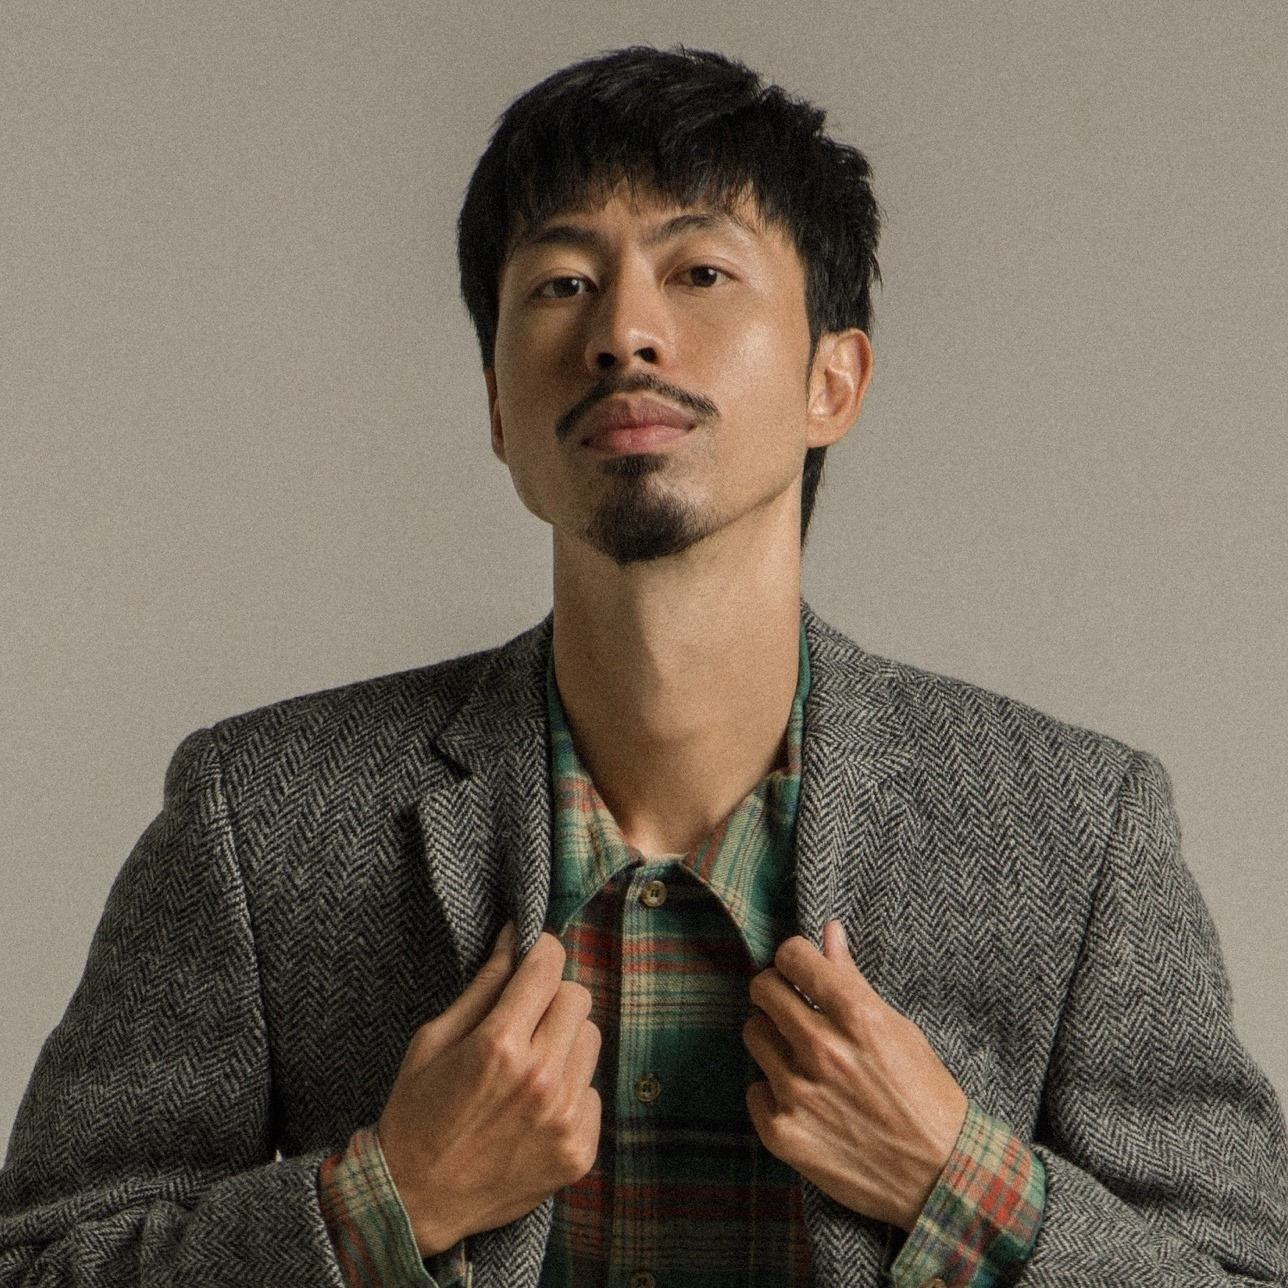

In [48]:
from IPython.display import Image
Image(filename= 'denvau_test.jpg') 

In [49]:
# convert it from BGR (OpenCV ordering) to dlib ordering (RGB)
_rgb = cv2.cvtColor(_image, cv2.COLOR_BGR2RGB)

In [50]:
#convert image to Greyscale for haarcascade
_gray = cv2.cvtColor(_image, cv2.COLOR_BGR2GRAY)

In [51]:
faces = faceCascade.detectMultiScale(_gray,
                                     scaleFactor=1.1,
                                     minNeighbors=5,
                                     minSize=(60, 60),
                                     flags=cv2.CASCADE_SCALE_IMAGE)
faces

array([[471, 150, 335, 335]])

In [52]:
# the facial embeddings for face in input
encodings = face_recognition.face_encodings(_rgb)
names = []

In [53]:
encodings

[array([-1.57264188e-01,  3.85622941e-02,  8.34407136e-02, -6.23219647e-03,
        -8.62852782e-02, -6.34491369e-02,  3.92868649e-03, -1.61252677e-01,
         6.86578825e-02, -8.64443332e-02,  3.01984310e-01, -8.25857595e-02,
        -1.60647124e-01, -1.04350224e-01, -2.05662586e-02,  1.33521020e-01,
        -1.76025108e-01, -1.41512945e-01, -9.20903236e-02,  7.34946318e-03,
         8.76976252e-02, -1.35637242e-02,  2.86172470e-03,  4.80211675e-02,
        -1.03274755e-01, -3.28034997e-01, -1.51225790e-01, -9.03525054e-02,
         1.32965520e-01, -4.56431992e-02, -7.73919839e-03, -9.37938020e-02,
        -1.83249950e-01,  1.80910118e-02, -2.27185227e-02,  4.12487239e-02,
         1.14323469e-02, -1.02004759e-01,  1.52609661e-01, -6.63495213e-02,
        -2.34049976e-01, -2.48562098e-02,  3.75337563e-02,  1.85531482e-01,
         1.44584045e-01,  2.86576413e-02,  6.25778288e-02, -7.85092115e-02,
         6.99003693e-03, -1.35866344e-01,  3.30699086e-02,  1.27062708e-01,
         1.0

In [54]:
#Compare encodings with encodings in data["encodings"]
# #Matches contain array with boolean values and True for the embeddings it matches closely
#and False for rest
matches = face_recognition.compare_faces(data["encodings"], encodings[0])

In [55]:
print(matches)

[True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False]


In [57]:
#set name =inknown if no encoding matches
name = "Unknown"

In [58]:
# check to see if we have found a match
if True in matches:
    #Find positions at which we get True and store them
    matchedIdxs = [i for (i, b) in enumerate(matches) if b]
    counts = {}
    # loop over the matched indexes and maintain a count for
    # each recognized face face
    for i in matchedIdxs:
        #Check the names at respective indexes we stored in matchedIdxs
        name = data["names"][i]
        #increase count for the name we got
        counts[name] = counts.get(name, 0) + 1
        #set name which has highest count
        name = max(counts, key=counts.get)
 
 
    # update the list of names
    names.append(name)
    print(names)
    # loop over the recognized faces
    for ((x, y, w, h), name) in zip(faces, names):
        # rescale the face coordinates
        # draw the predicted face name on the image
        cv2.rectangle(img = _image, pt1 = (x, y), pt2 = (x + w, y + h), color = (0, 255, 0),
                    thickness = 2)
        cv2.putText(_image, name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.75, (0, 255, 0), 2)


['Den']


In [61]:
cv2.imshow("Frame", _image)
cv2.waitKey(0)

-1